                                                            TALLER #2

                                                    Transformadas de Fourier discretas

Catalina Flórez - 
Gabriel Borrero - 202212129

Punto 1. El ciclo de actividad solar

Punto 2. Transformada 2D

                                                            TRANSFORMADA 2D

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img = np.array(Image.open("C:\\Users\\gaboe\\Desktop\\Noisy_Smithsonian_Castle.jpg")).astype(float)


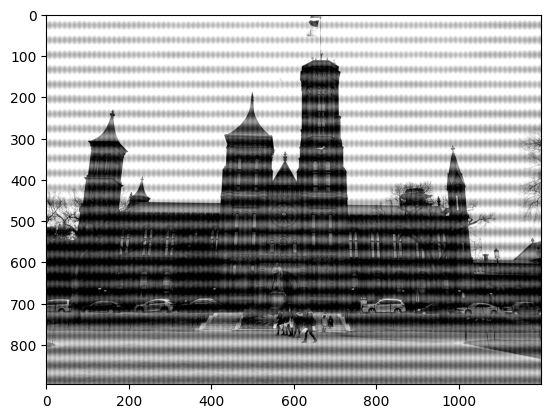

In [13]:
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.show()

2.1)  Grafique la transformada de Fourier bidimensional con np.fft.fft2. Use np.fft.fftshift para centrar el componente de frecuencia cero. Use una escala de color logarítmica para poder observar los detalles.

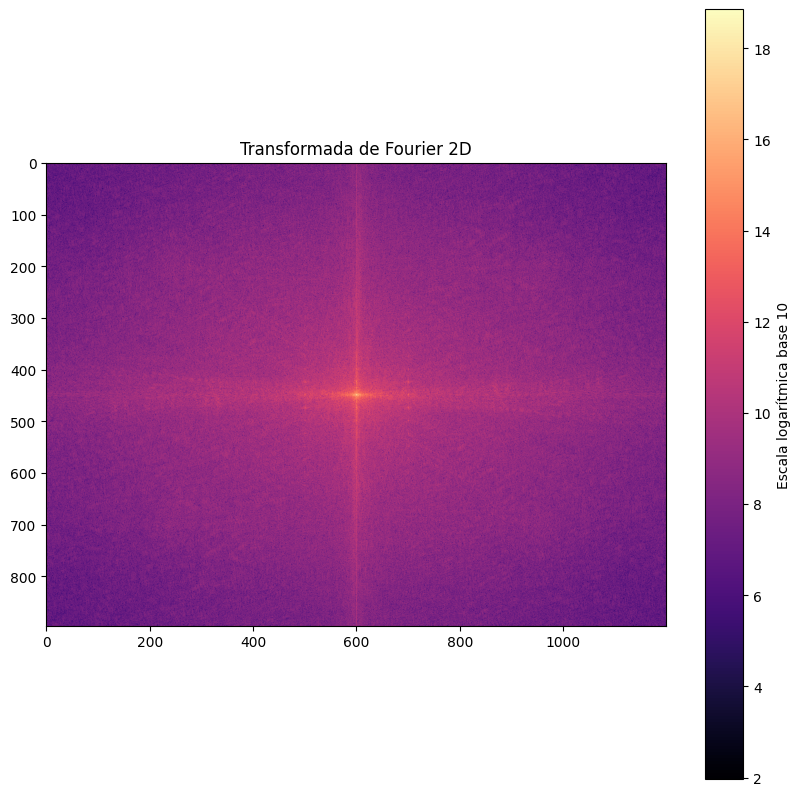

In [14]:
transformada_fourier = np.fft.fft2(img)

transformada_fourier_centrada = np.fft.fftshift(transformada_fourier)

escala_logaritmica = np.log(np.abs(transformada_fourier_centrada))  


plt.figure(figsize=(10, 10))
#Aunque el enunciado recomienda utilizar cmap="gray", decidimos utilizar cmap="magma" para que se aprecien mejor los puntos brillantes aledaños al centro
plt.imshow(escala_logaritmica, cmap='magma')
plt.colorbar(label='Escala logarítmica base 10')
plt.title("Transformada de Fourier 2D")
plt.show()

2.2)  El ruido periódico de la imagen se representa en los puntos brillantes de la transformada (exceptuando
 el centro). Por ejemplo, las barras horizontales en la imagen se ven como una línea horizontal en la
 imagen del a transformada...

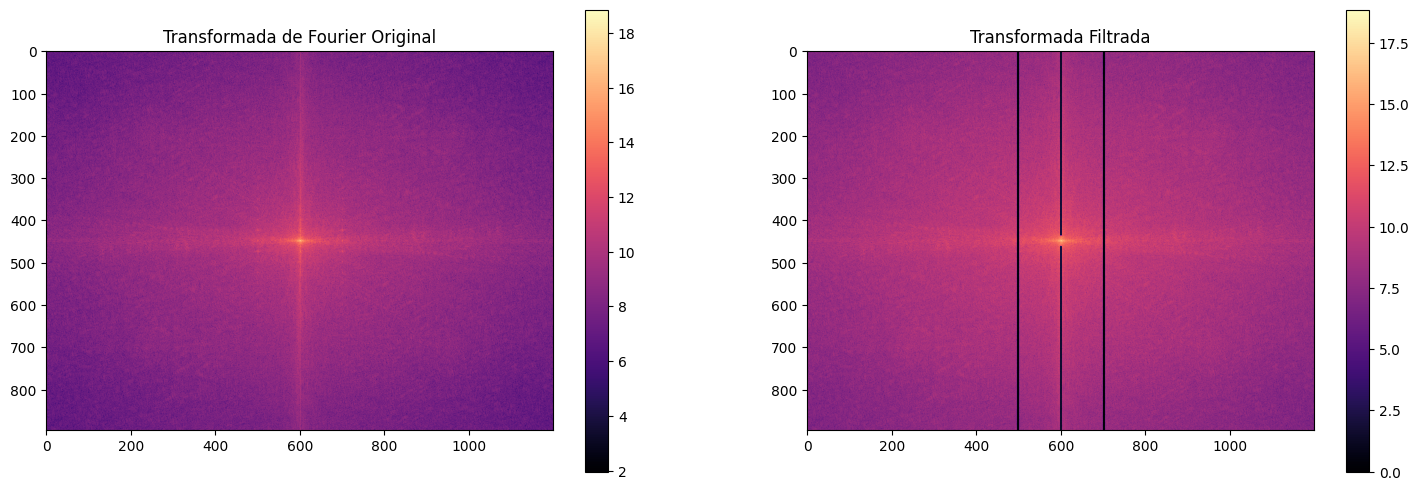

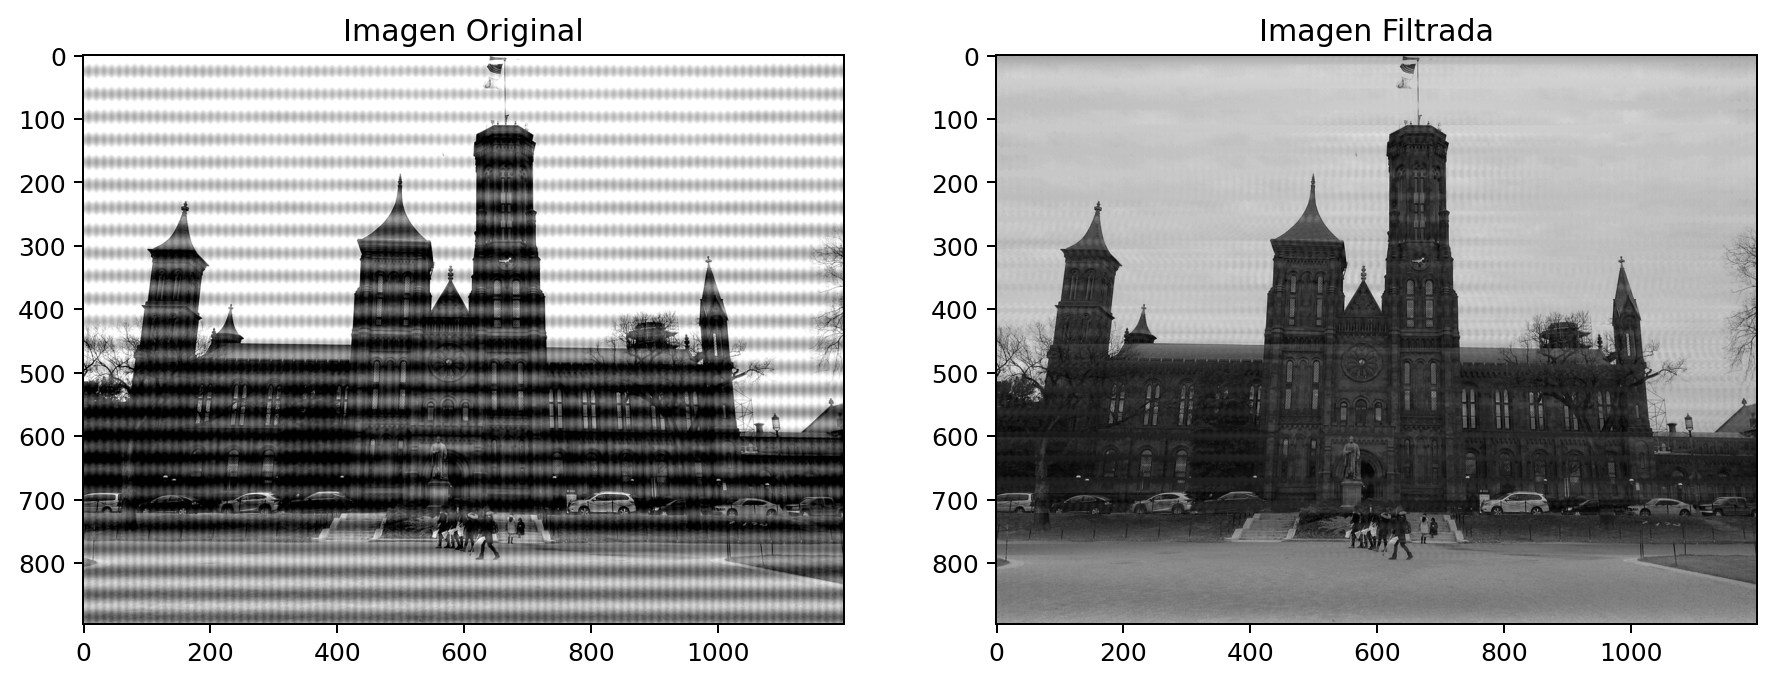

In [16]:
#Creamos una copia de la transformada que hallamos en el punto anterior para modificarla más adelante
F_filtered = np.copy(transformada_fourier_centrada )

#Aquí obtenemos las dimensiones de la imagen
rows, cols = transformada_fourier_centrada .shape
center_row, center_col = rows // 2, cols // 2

#Definimos el radio alrededor del centro que no debe ser tocado (13 fue el mejor valor experimental, pues valores mayores o menores generan distorsiones)
radius = 13

#Definimos el ancho de las líneas verticales a eliminar (2 fue el mejor valor experimental, pues valores mayores o menores generan distorsiones)
line_width = 2

#En este punto, estamos eliminando la línea vertical que pasa por el centro, excluyendo el radio alrededor.
for i in range(center_col - (line_width), center_col + line_width):
    for j in range(rows):
        if not (center_row - radius < j < center_row + radius):
            F_filtered[j, i] = 0

#Finalmente, eliminamos los puntos que se encuentran a ambos lados del centro, tratándolos como dos líneas verticales a ambos lados del centro.
lines_to_remove = [(center_col - 104, center_col - 99), (center_col + 99, center_col + 104)] # Las lineas verticales que interceptan estos puntos a mabos lados del centro se encuntran en (center_col - 104, center_col - 99) y (center_col + 99, center_col + 104)
for line_start, line_end in lines_to_remove:
    for i in range(line_start, line_end):
        for j in range(rows):
            F_filtered[j, i] = 0

#Ahora, vamos a visualizar la transformada de Fourier original y la filtrada
plt.figure(figsize=(18, 6))

#Transformada de Fourier Original
plt.subplot(1, 2, 1)
plt.title("Transformada de Fourier Original")
plt.imshow(np.log(np.abs(transformada_fourier_centrada )), cmap='magma')
plt.colorbar()

#Transformada de Fourier Filtrada
plt.subplot(1, 2, 2)
plt.title("Transformada Filtrada")
magnitude_spectrum = np.log(np.abs(F_filtered)+1)
plt.imshow(magnitude_spectrum, cmap='magma', vmin=0, vmax=np.max(magnitude_spectrum))
plt.colorbar()



#Imprimimos la transformada de Fourier original y la filtrada

plt.savefig("transformada.png",bbox_inches="tight",pad_inches=0.1,dpi=250)
plt.show()

#Obtenemos la transformada inversa para obtener la imagen filtrada
F_filtered = np.fft.ifftshift(F_filtered)
img_filtered = np.fft.ifft2(F_filtered)
img_filtered = np.abs(img_filtered)

#Ajustar el contraste de la imagen filtrada para mejorar el enfoque
#img_filtered = np.clip(img_filtered, 0, 255)  # Limitar los valores para evitar efectos no deseados


#Mostramos la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6),dpi=180)


plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(img, cmap='gray')


plt.subplot(1, 2, 2)
plt.title("Imagen Filtrada")
plt.imshow(img_filtered, cmap='gray')

plt.show()
